In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
muhammadroshaanriaz_time_wasters_on_social_media_path = kagglehub.dataset_download('muhammadroshaanriaz/time-wasters-on-social-media')

print('Data source import complete.')


100%|██████████| 36.0k/36.0k [00:00<00:00, 10.4MB/s]

Extracting files...
Data source import complete.


## <b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>Time Wasters on Social Media</div></b>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Time-Wasters on Social Media Dataset**

**Overview**

The "Time-Wasters on Social Media" dataset offers a detailed look into user behavior and engagement with social media platforms. It captures various attributes that can help analyze the impact of social media on users' time and productivity. This dataset is valuable for researchers, marketers, and social scientists aiming to understand the nuances of social media consumption.

This dataset was generated using synthetic data techniques with the help of NumPy and pandas. The data is artificially created to simulate real-world social media usage patterns for research and analysis purposes.**

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [8]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/muhammadroshaanriaz/time-wasters-on-social-media/versions/1/Time-Wasters on Social Media.csv')

In [9]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [10]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (1000, 31)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
UserID,int64,0,0.0,0,1000,1000,1.0,1000.0,500.5,288.819436,1,2,3
Age,int64,0,0.0,0,47,1000,18.0,64.0,40.986,13.497852,56,46,32
Gender,object,0,0.0,0,3,1000,NaN,NaN,NaN,NaN,Male,Female,Female
Location,object,0,0.0,0,10,1000,NaN,NaN,NaN,NaN,Pakistan,Mexico,United States
Income,int64,0,0.0,0,996,1000,20138.0,99676.0,59524.213,23736.212925,82812,27999,42436
Debt,bool,0,0.0,0,2,1000,NaN,NaN,NaN,NaN,True,False,False
Owns Property,bool,0,0.0,0,2,1000,NaN,NaN,NaN,NaN,True,True,True
Profession,object,0,0.0,0,9,1000,NaN,NaN,NaN,NaN,Engineer,Artist,Engineer
Demographics,object,0,0.0,0,2,1000,NaN,NaN,NaN,NaN,Rural,Urban,Rural
Platform,object,0,0.0,0,4,1000,NaN,NaN,NaN,NaN,Instagram,Instagram,Facebook


In [11]:
#Correct country name in Dataset
df.replace({'Barzil':'Brazil'}, regex=True,  inplace=True)

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1000
Variables: 31
cat_cols: 20
num_cols: 11
cat_but_car: 0
num_but_cat: 7


In [13]:
cols_cat = ['Gender',  'Location', 'Profession', 'Demographics', 'Platform',
          'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS',
          'Watch Time', 'CurrentActivity', 'ConnectionType', 'Importance Score',
          'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level']

        Gender  Ratio
Gender               
Male       514   51.4
Female     322   32.2
Other      164   16.4


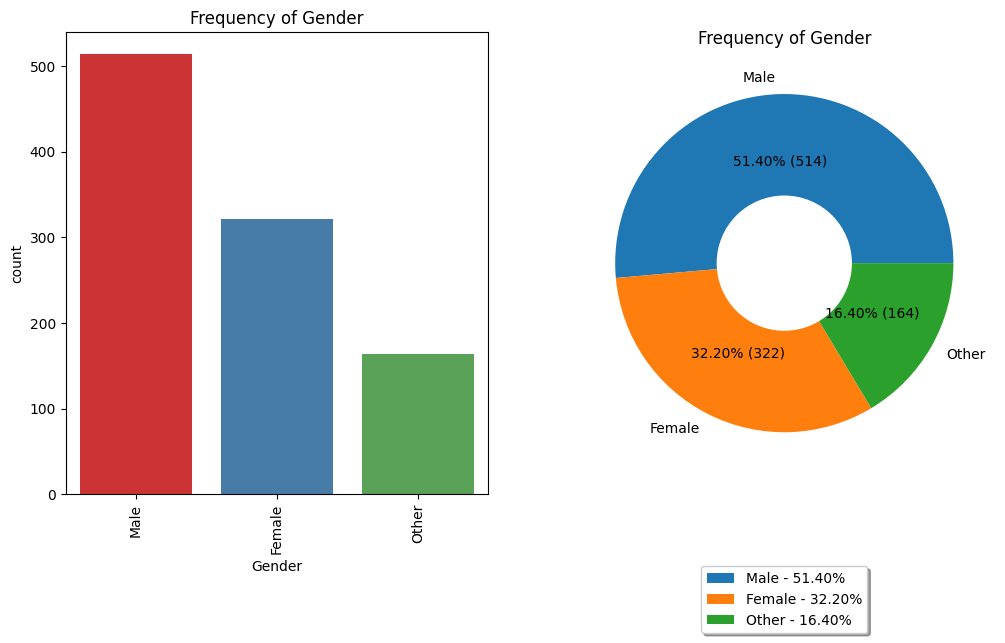

               Location  Ratio
Location                      
India               228   22.8
United States       174   17.4
Vietnam              82    8.2
Brazil               78    7.8
Philippines          78    7.8
Indonesia            77    7.7
Pakistan             76    7.6
Japan                75    7.5
Mexico               73    7.3
Germany              59    5.9


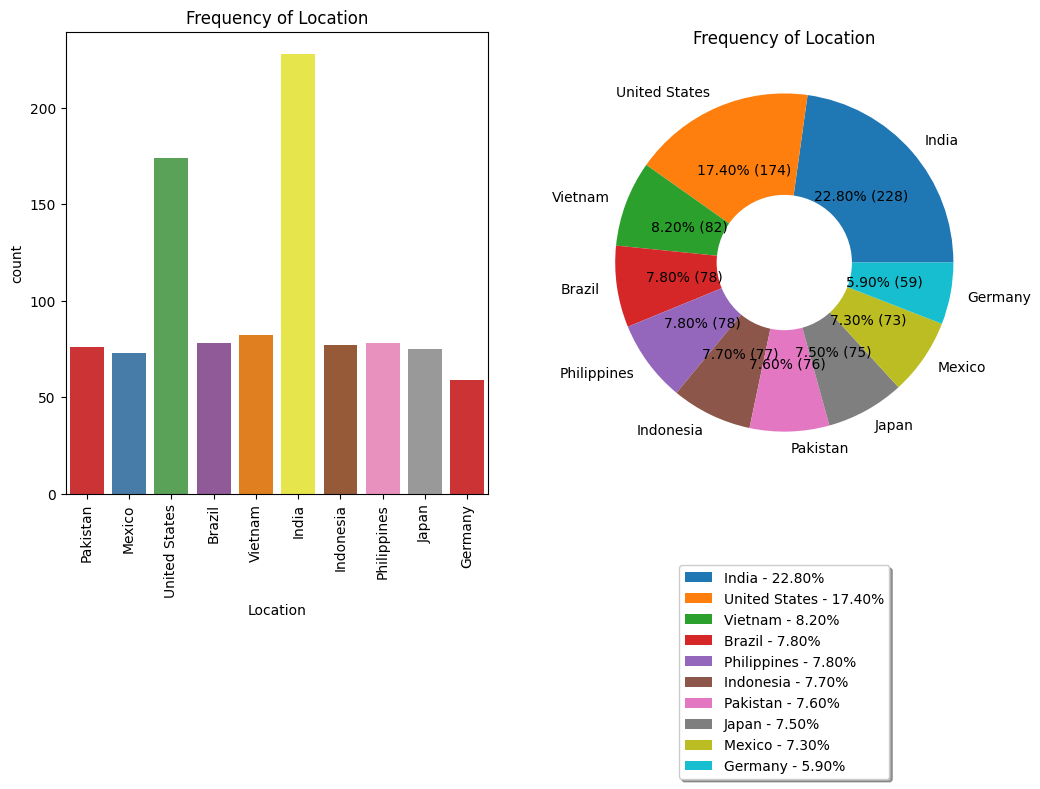

               Profession  Ratio
Profession                      
Students              246   24.6
Waiting staff         194   19.4
Labor/Worker          186   18.6
driver                113   11.3
Engineer               65    6.5
Cashier                56    5.6
Manager                54    5.4
Artist                 47    4.7
Teacher                39    3.9


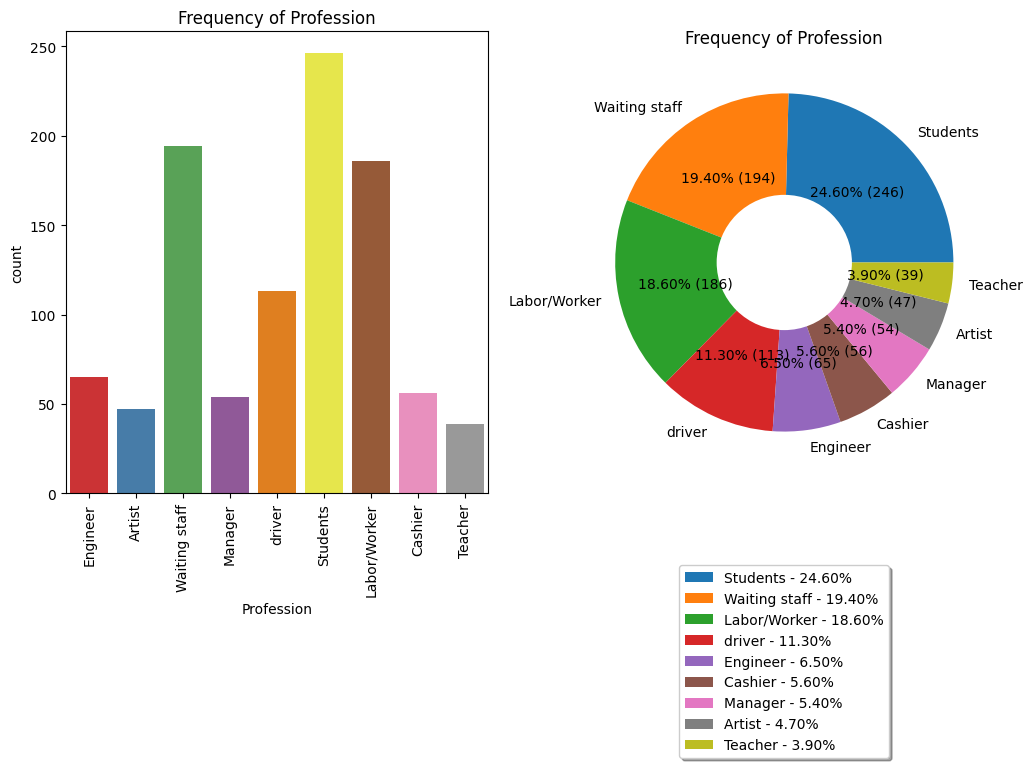

              Demographics  Ratio
Demographics                     
Rural                  746   74.6
Urban                  254   25.4


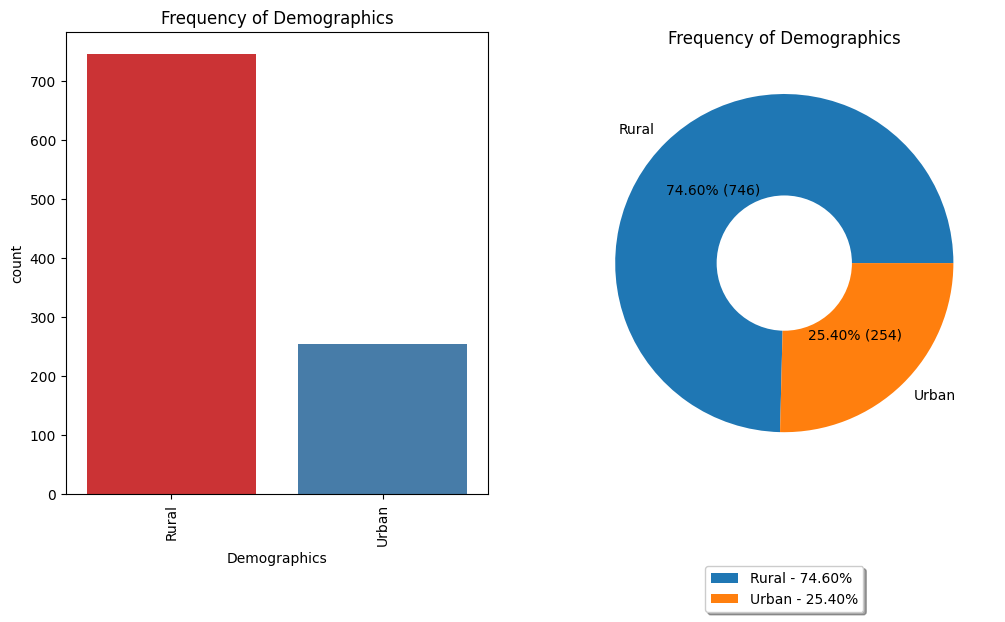

           Platform  Ratio
Platform                  
TikTok          273   27.3
Instagram       256   25.6
YouTube         250   25.0
Facebook        221   22.1


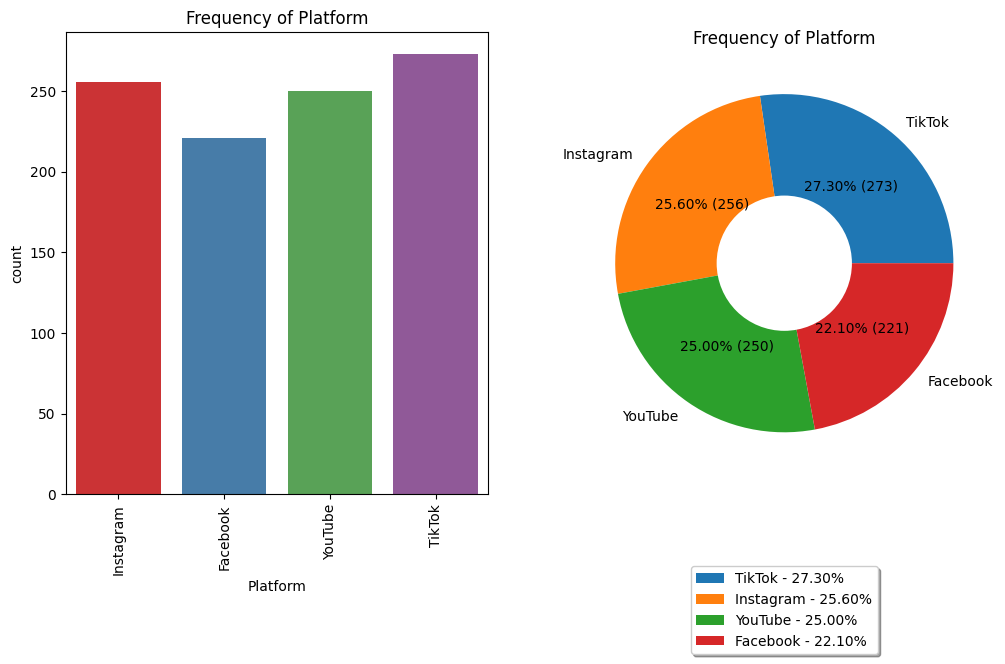

                Video Category  Ratio
Video Category                       
Jokes/Memes                179   17.9
Life Hacks                 162   16.2
Gaming                     119   11.9
Vlogs                      114   11.4
Pranks                     110   11.0
Entertainment              102   10.2
Trends                     100   10.0
ASMR                        79    7.9
Comedy                      35    3.5


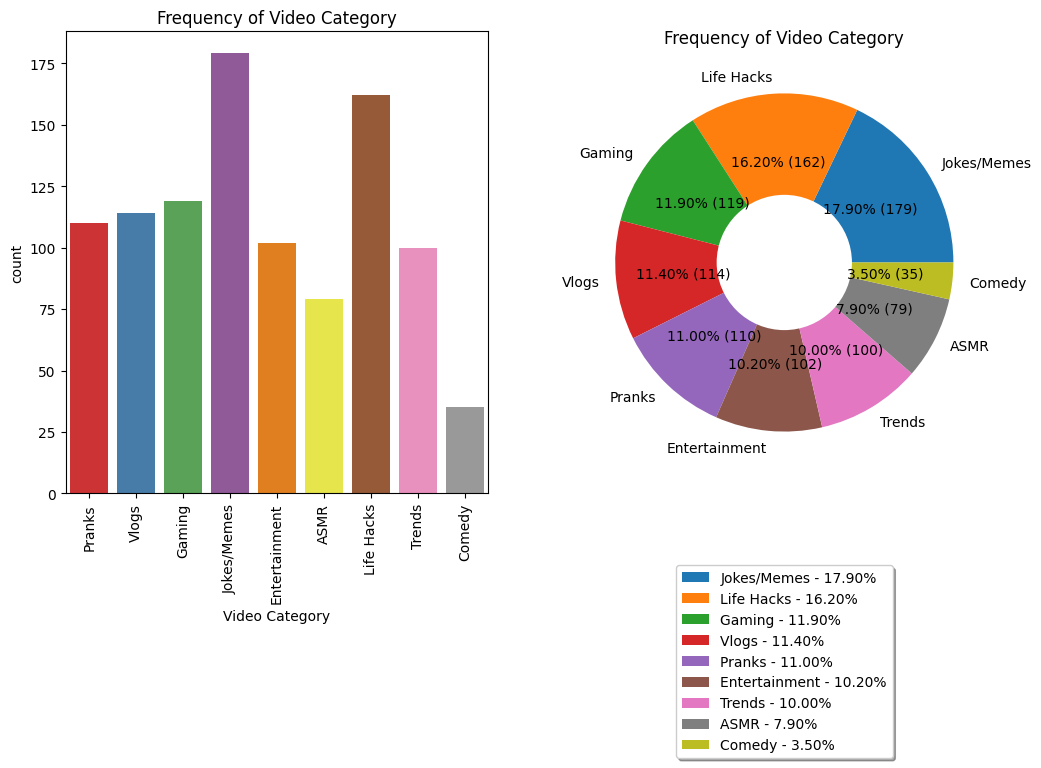

           Frequency  Ratio
Frequency                  
Evening          365   36.5
Night            306   30.6
Afternoon        223   22.3
Morning          106   10.6


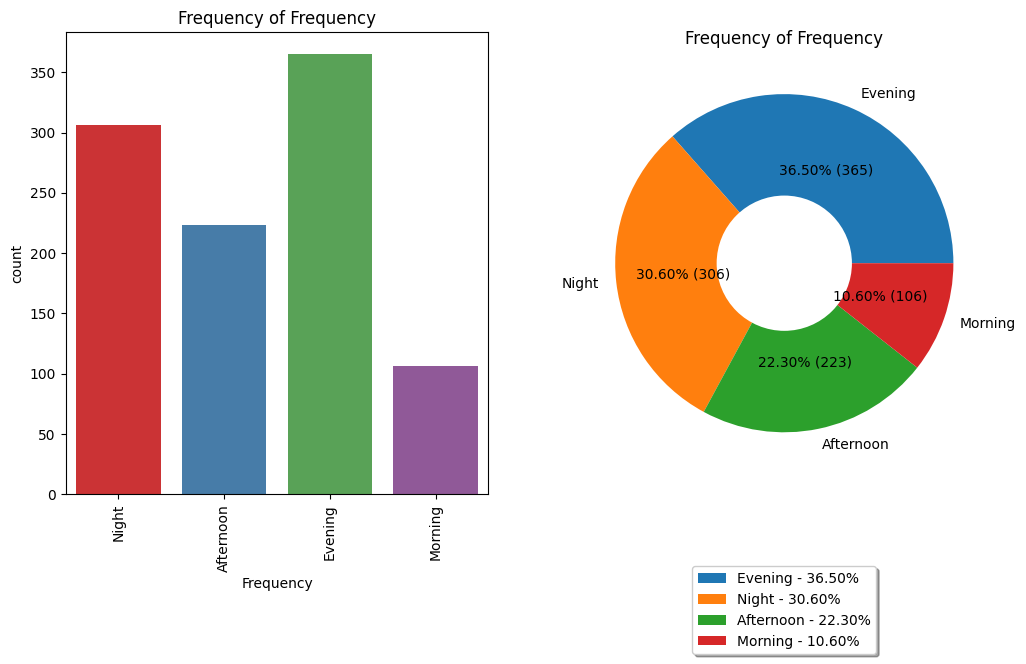

                 Watch Reason  Ratio
Watch Reason                        
Habit                     339   33.9
Boredom                   277   27.7
Entertainment             264   26.4
Procrastination           120   12.0


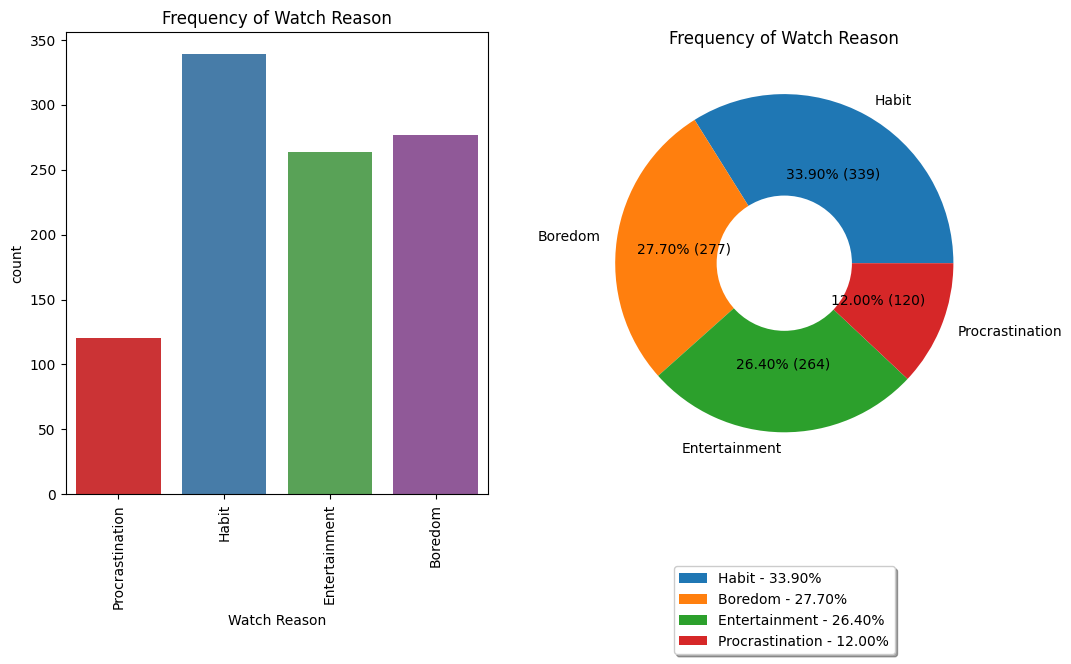

            DeviceType  Ratio
DeviceType                   
Smartphone         585   58.5
Tablet             283   28.3
Computer           132   13.2


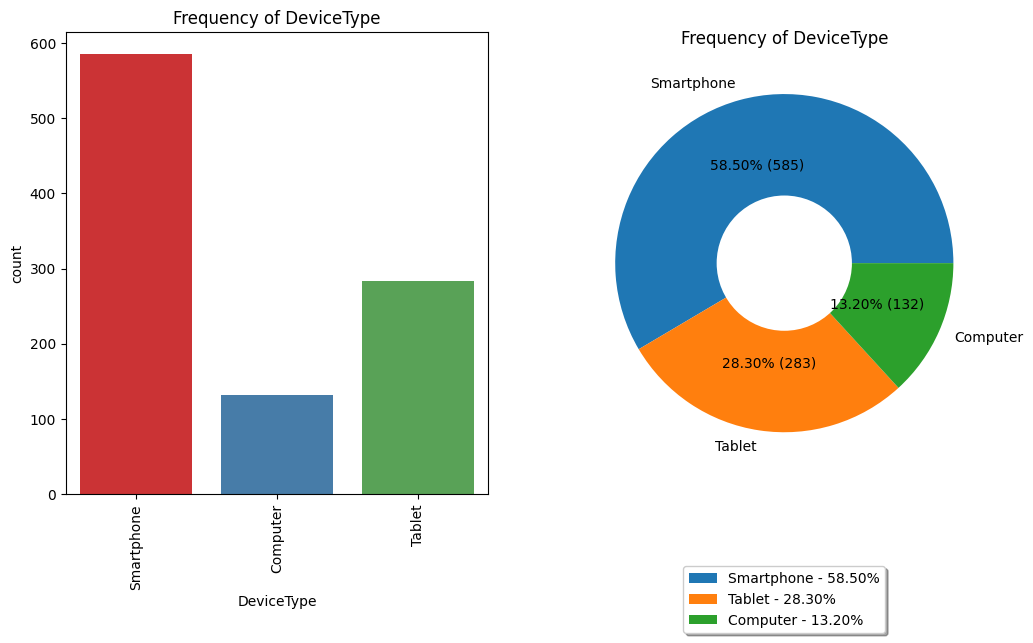

          OS  Ratio
OS                 
Android  500   50.0
iOS      261   26.1
Windows  123   12.3
MacOS    116   11.6


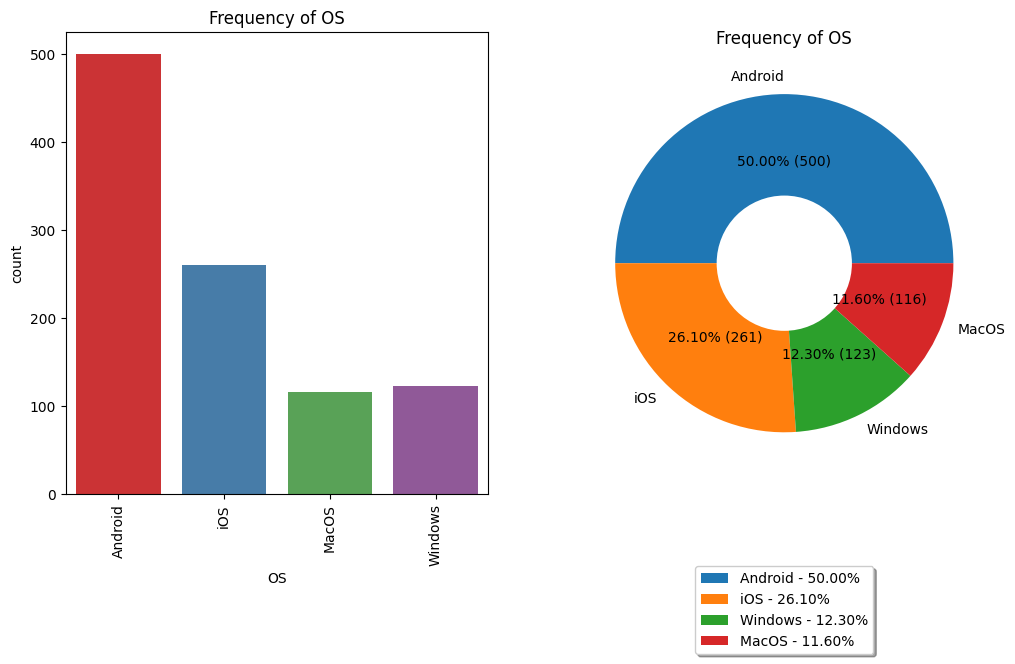

            Watch Time  Ratio
Watch Time                   
2:00 PM            149   14.9
9:00 PM            117   11.7
5:00 PM             92    9.2
4:25 PM             77    7.7
3:55 PM             70    7.0
3:45 PM             69    6.9
10:15 PM            66    6.6
11:30 PM            63    6.3
8:30 PM             60    6.0
5:45 PM             47    4.7
6:05 PM             43    4.3
8:00 AM             41    4.1
7:25 PM             41    4.1
7:45 AM             26    2.6
9:15 AM             21    2.1
9:55 AM             18    1.8


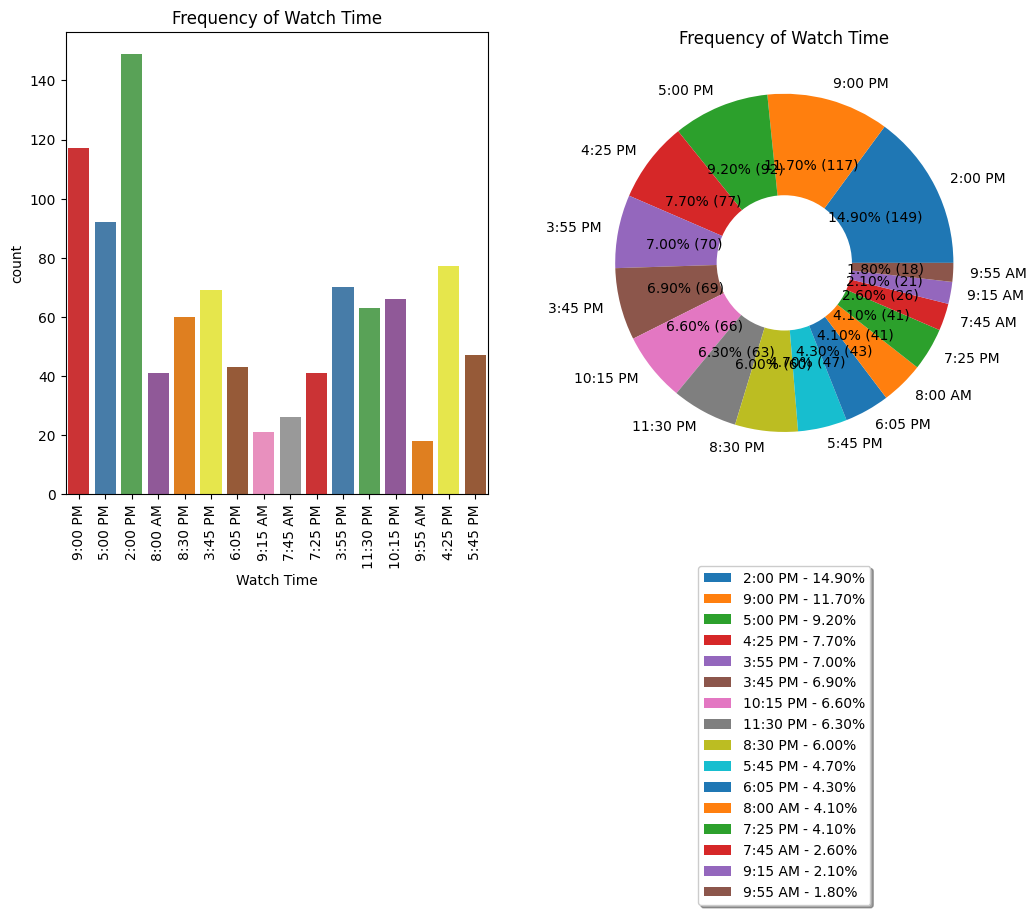

                 CurrentActivity  Ratio
CurrentActivity                        
At home                      381   38.1
At school                    271   27.1
At work                      234   23.4
Commuting                    114   11.4


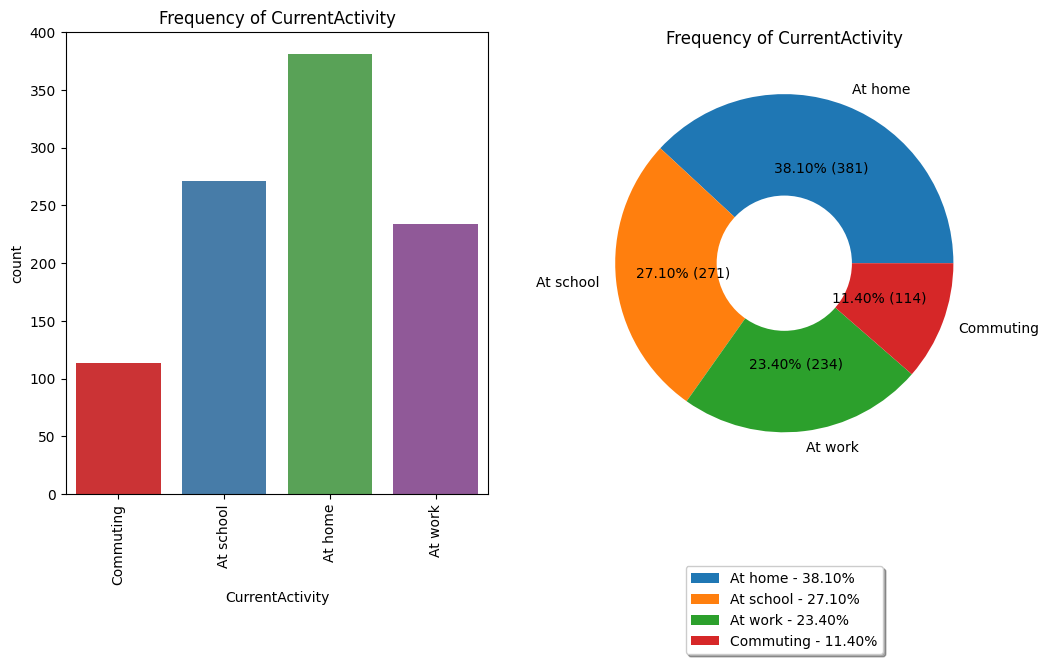

                ConnectionType  Ratio
ConnectionType                       
Mobile Data                686   68.6
Wi-Fi                      314   31.4


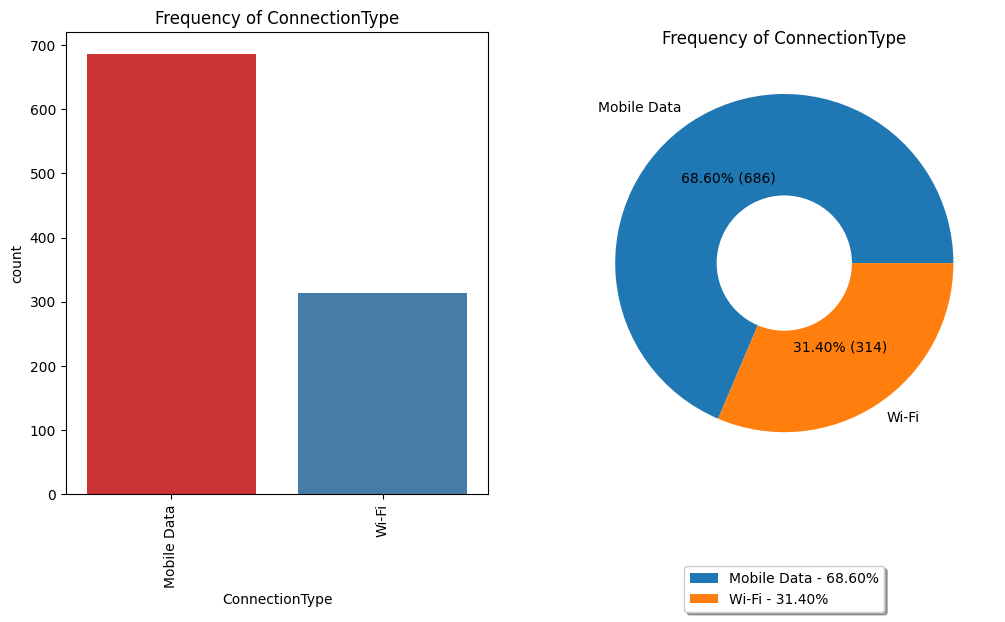

                  Importance Score  Ratio
Importance Score                         
9                              122   12.2
4                              121   12.1
7                              116   11.6
8                              116   11.6
6                              112   11.2
2                              112   11.2
5                              103   10.3
3                               99    9.9
1                               99    9.9


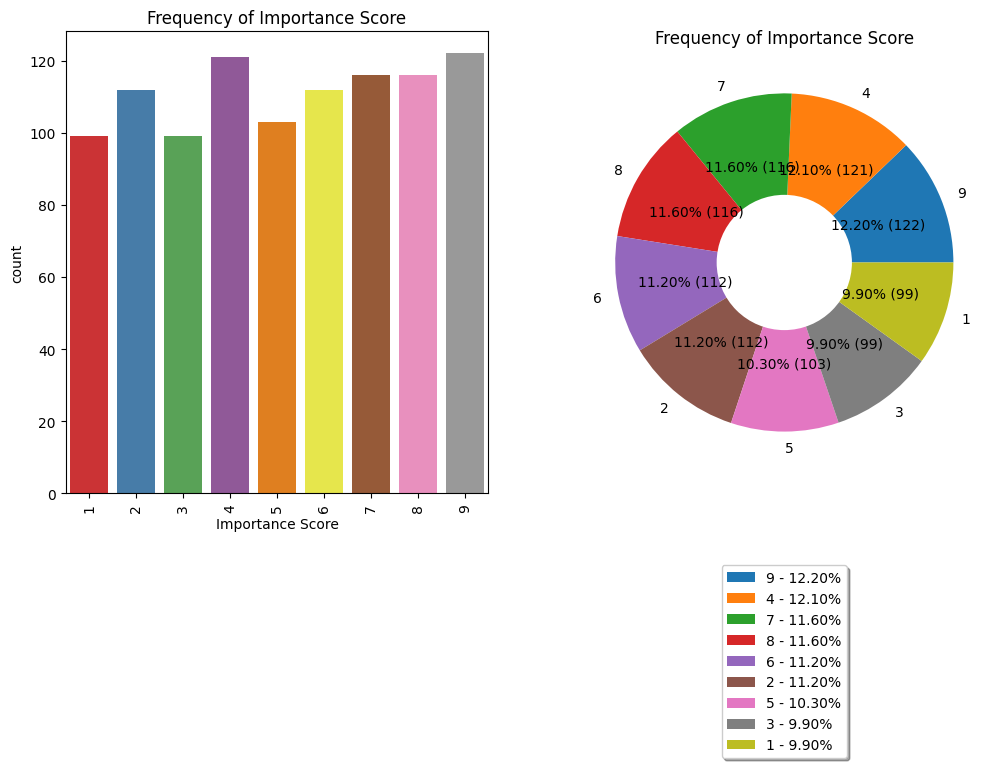

                  ProductivityLoss  Ratio
ProductivityLoss                         
6                              247   24.7
3                              228   22.8
5                              158   15.8
8                              145   14.5
7                               60    6.0
1                               55    5.5
9                               37    3.7
4                               36    3.6
2                               34    3.4


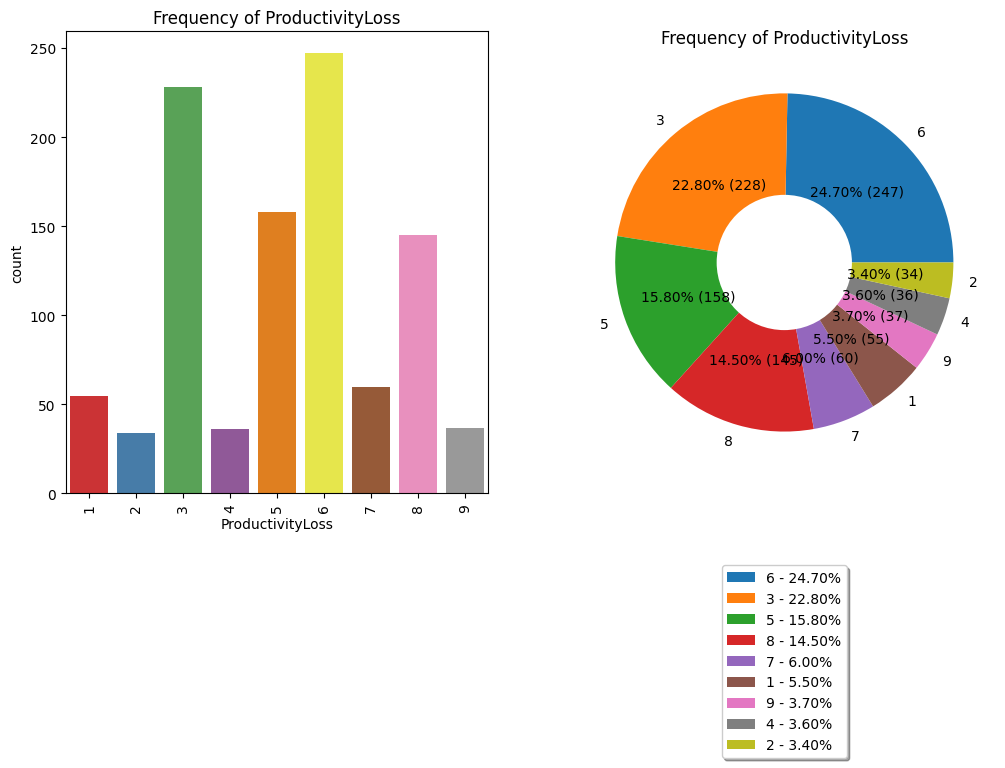

              Satisfaction  Ratio
Satisfaction                     
4                      247   24.7
7                      228   22.8
5                      158   15.8
2                      145   14.5
3                       60    6.0
9                       55    5.5
1                       37    3.7
6                       36    3.6
8                       34    3.4


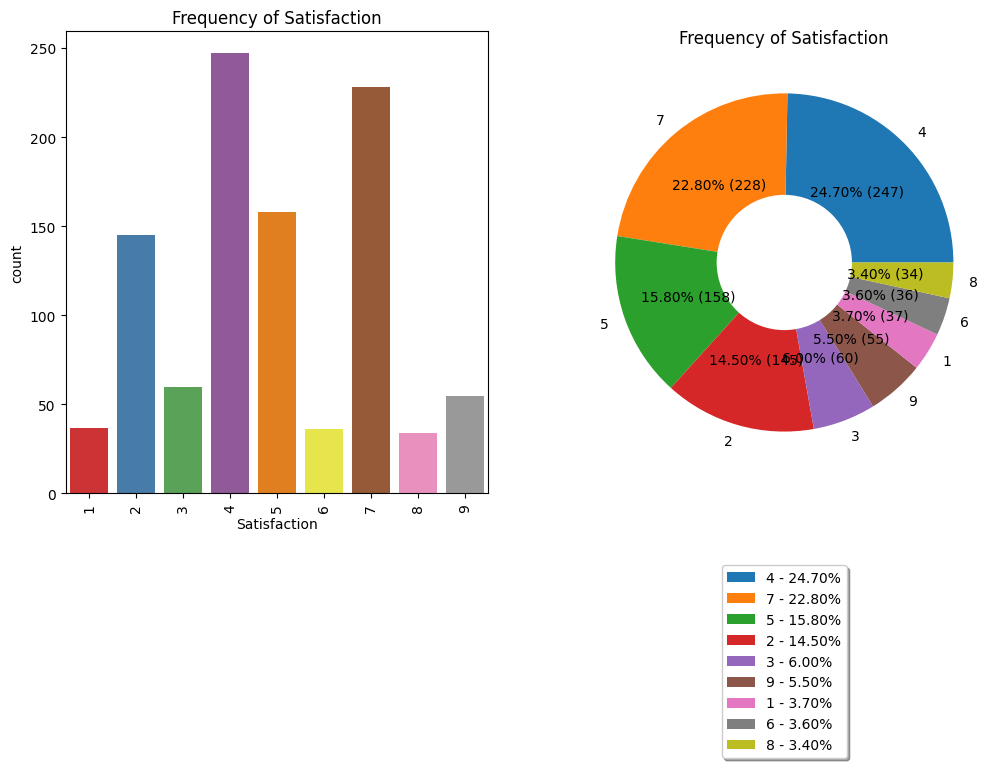

              Self Control  Ratio
Self Control                     
8                      248   24.8
5                      228   22.8
10                     180   18.0
7                      159   15.9
9                       60    6.0
3                       55    5.5
6                       36    3.6
4                       34    3.4


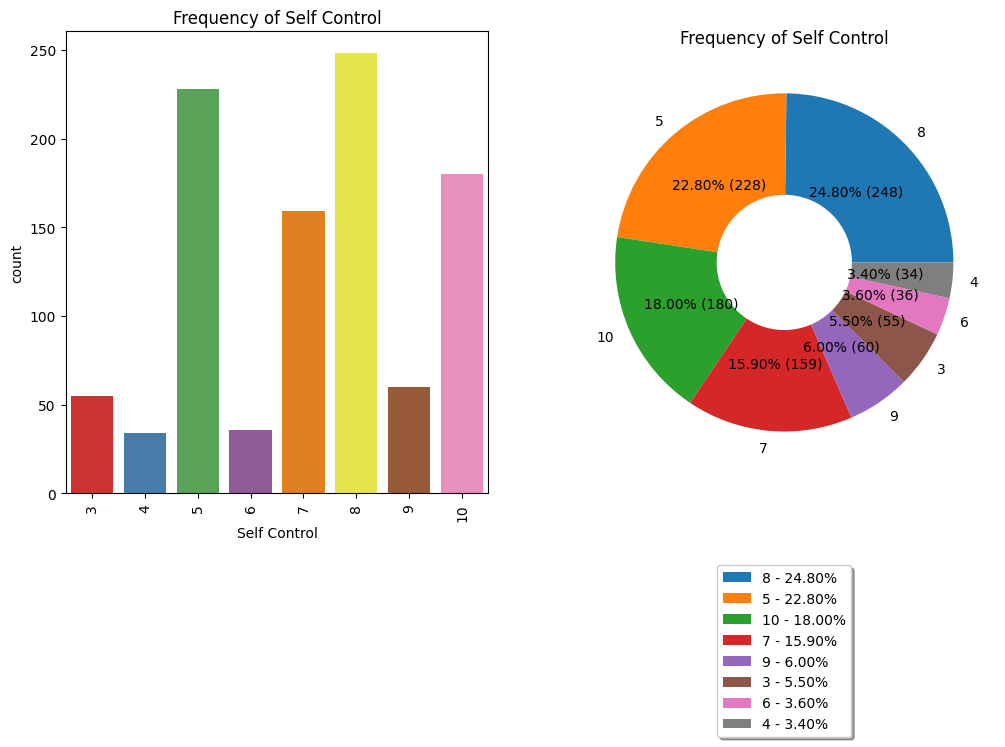

                 Addiction Level  Ratio
Addiction Level                        
2                            248   24.8
5                            228   22.8
0                            180   18.0
3                            159   15.9
1                             60    6.0
7                             55    5.5
4                             36    3.6
6                             34    3.4


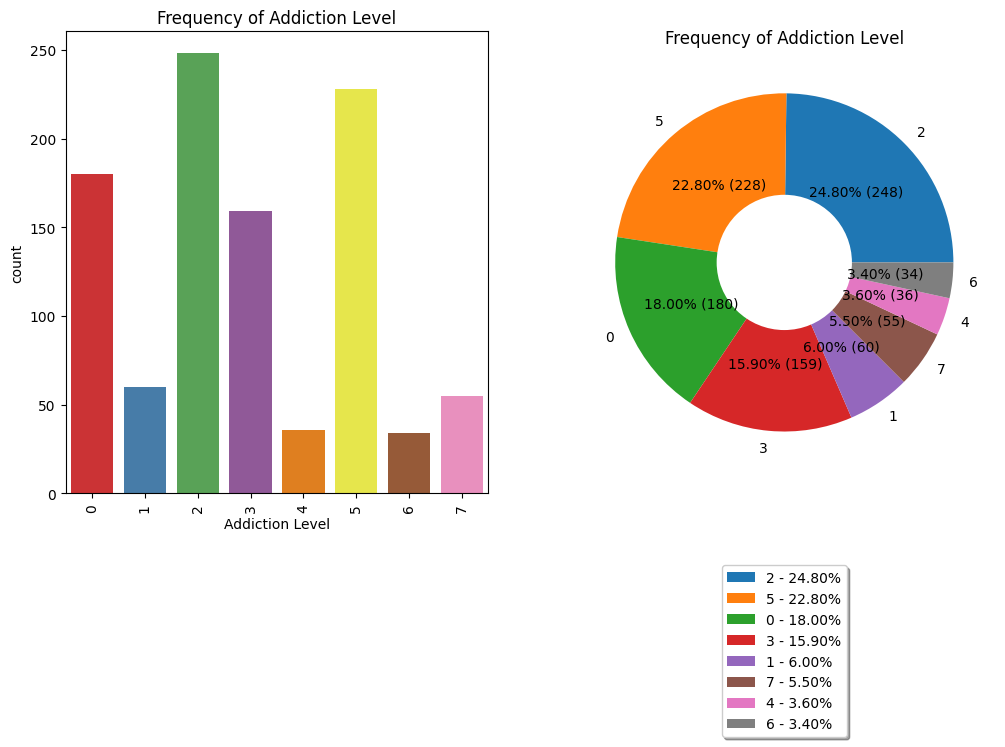

In [14]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe, palette = 'Set1')
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        hole = plt.Circle((0, 0), 0.40, facecolor='white')
        plt.gcf().gca().add_artist(hole)
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cols_cat:
    cat_summary(df, col, True)

UserID


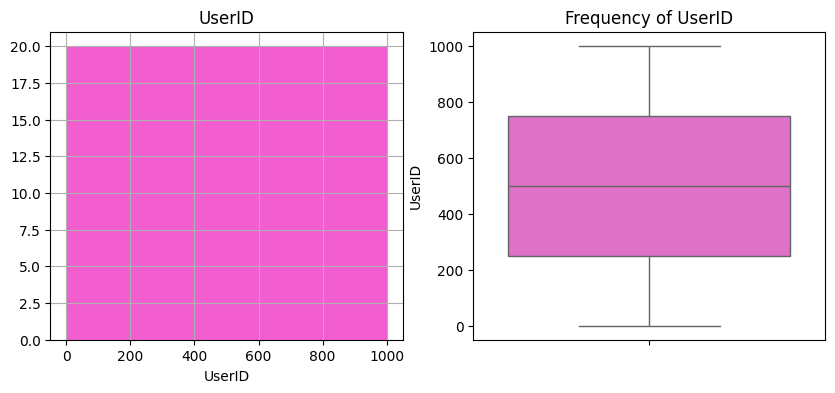

______________________________________________________

Age


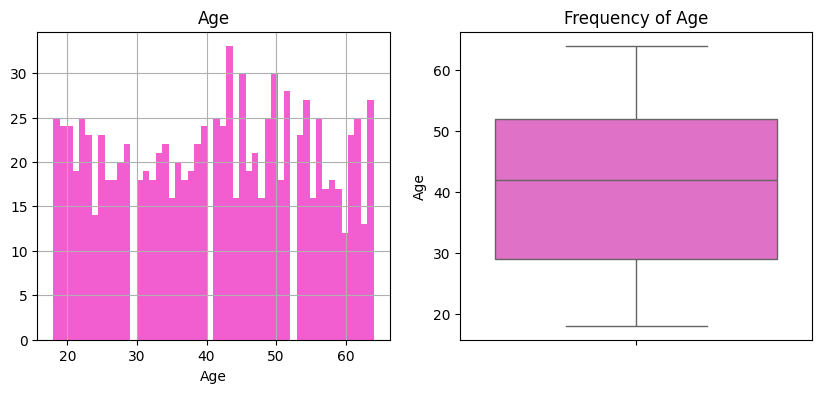

______________________________________________________

Income


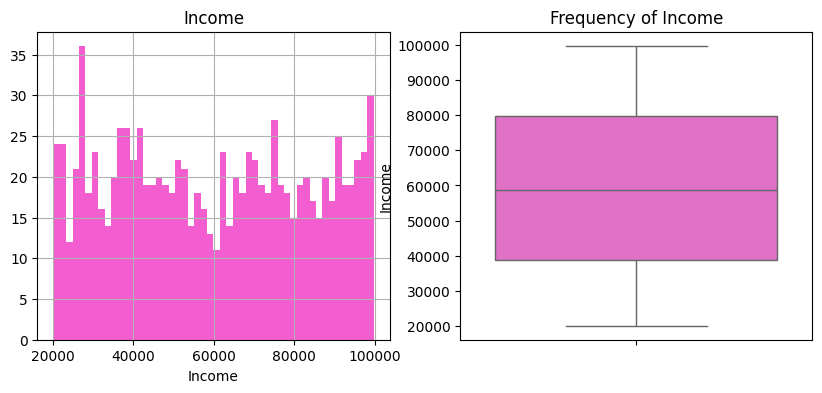

______________________________________________________

Total Time Spent


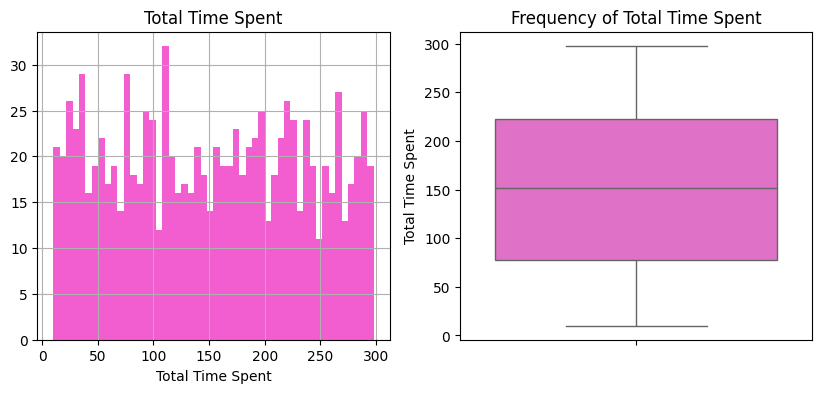

______________________________________________________

Number of Sessions


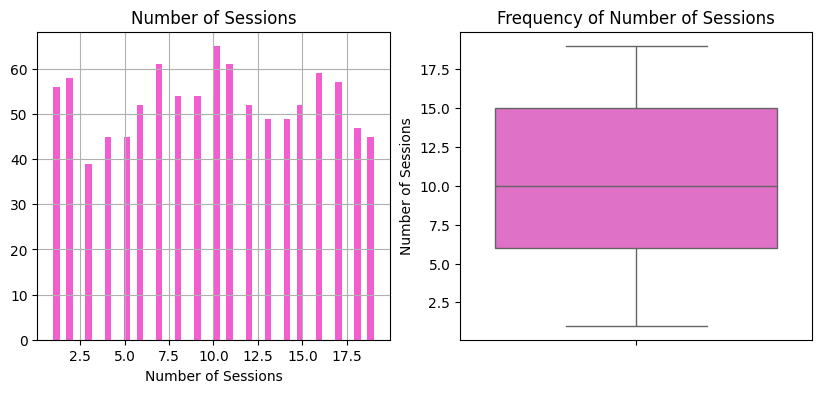

______________________________________________________

Video ID


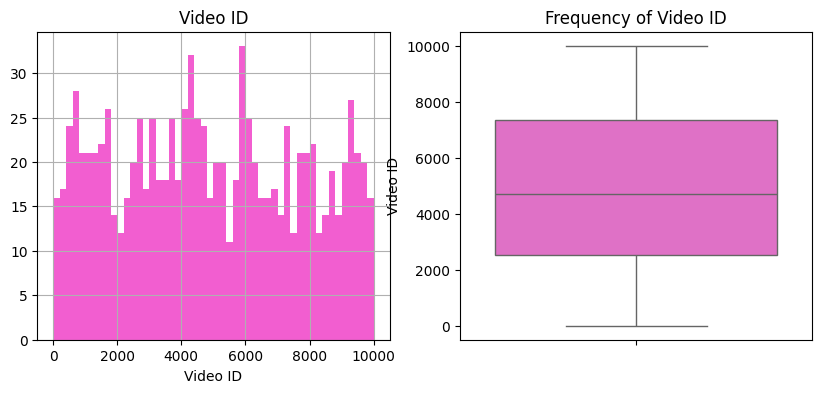

______________________________________________________

Video Length


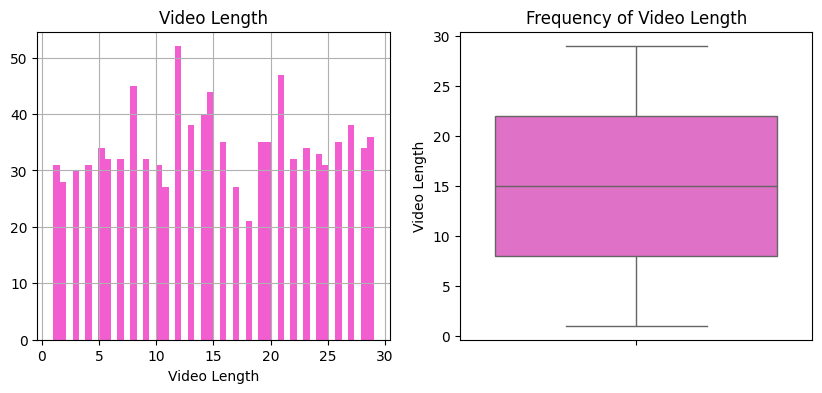

______________________________________________________

Engagement


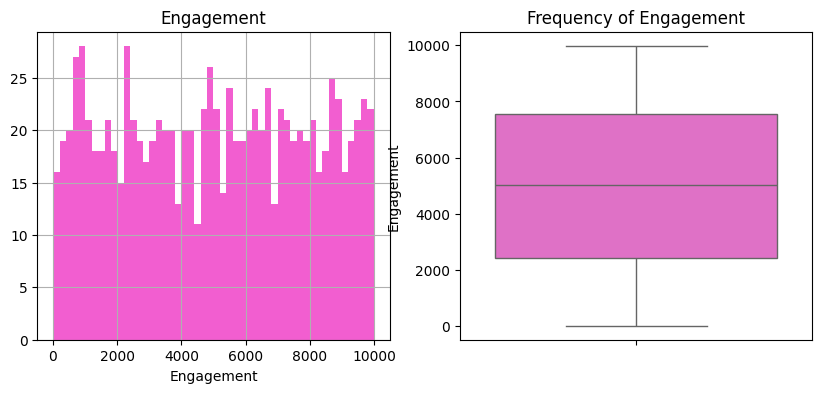

______________________________________________________

Time Spent On Video


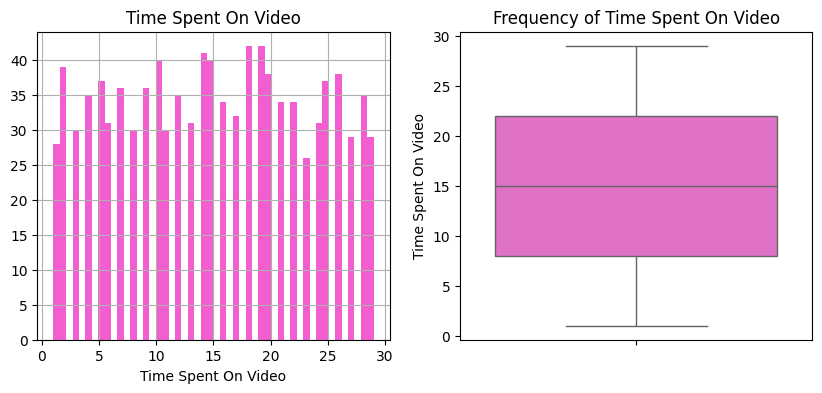

______________________________________________________

Number of Videos Watched


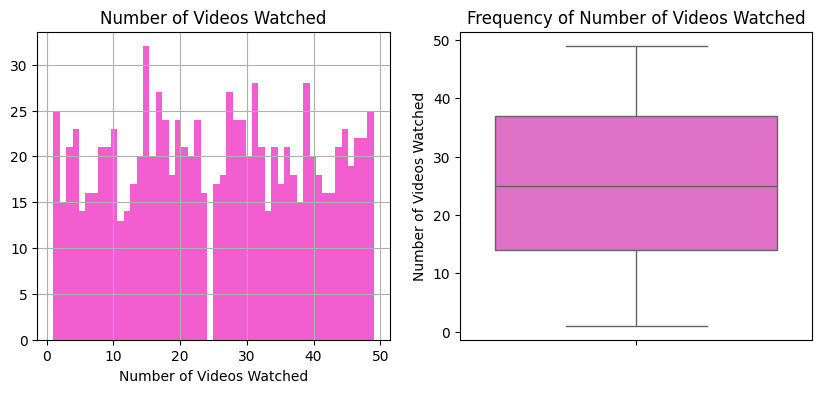

______________________________________________________

Scroll Rate


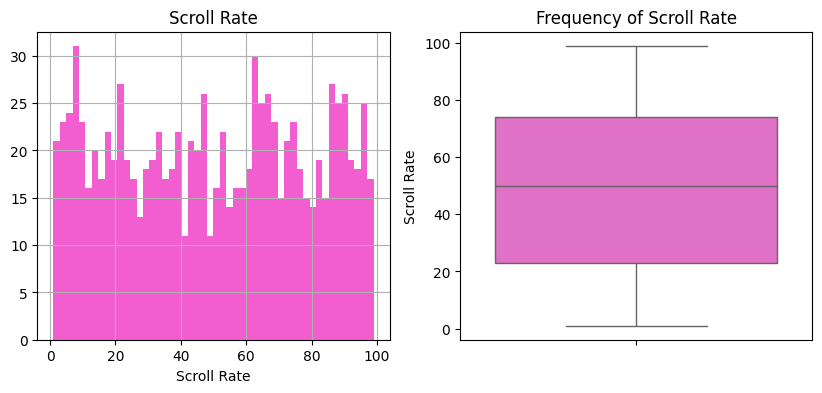

______________________________________________________



In [15]:
def num_summary(dataframe, numerical_col, plot=False):

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 4))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50, color="#f25ed0")
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe, color="#f25ed0")
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)

In [16]:
cols = ['Age', 'Income', 'Total Time Spent', 'Number of Sessions',
        'Video Length', 'Engagement', 'Time Spent On Video',
        'Number of Videos Watched', 'Scroll Rate']

colors = ["#8c0404","#f25ed0","#21618C","#16A085","#34495E",
          "#C70039", "#FF5733", "#FFC300", "#DAF7A6", "#B3B6B7",
          '#6495ED', '#40E0D0', '#9FE2BF', '#CCCCFF']

In [17]:
# Highest Location according to Average of Features

for i in cols:

    if i == 'Age':
        df_top = df.groupby(['Location'])[['Age']].mean()
        df_top = df_top.sort_values(by=("Age"), ascending=False).head(14)

        iplot(px.bar(df_top[:14],
             text_auto = True,
             color = df_top[:14].index,
             color_discrete_sequence = colors,
             labels=dict(index="Count Names",value=""),
             title = 'Highest Location according to Average of Age'
            ))

    else:

        df_top = df.groupby(['Location'])[[i]].mean()
        df_top = df_top.sort_values(by=[i], ascending=False).head(14)

        iplot(px.bar(df_top[:14],
             text_auto = True,
             color = df_top[:14].index,
             color_discrete_sequence = colors,
             labels=dict(index="Count Names",value=""),
             title = 'Highest Location according to Average of ' +i
             ))

In [18]:
cols_cat = ['Gender', 'Location', 'Profession', 'Demographics', 'Platform',
            'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS',
            'Watch Time', 'CurrentActivity', 'ConnectionType', 'Debt', 'Owns Property',
            'Importance Score', 'Satisfaction', 'Self Control', 'Addiction Level']

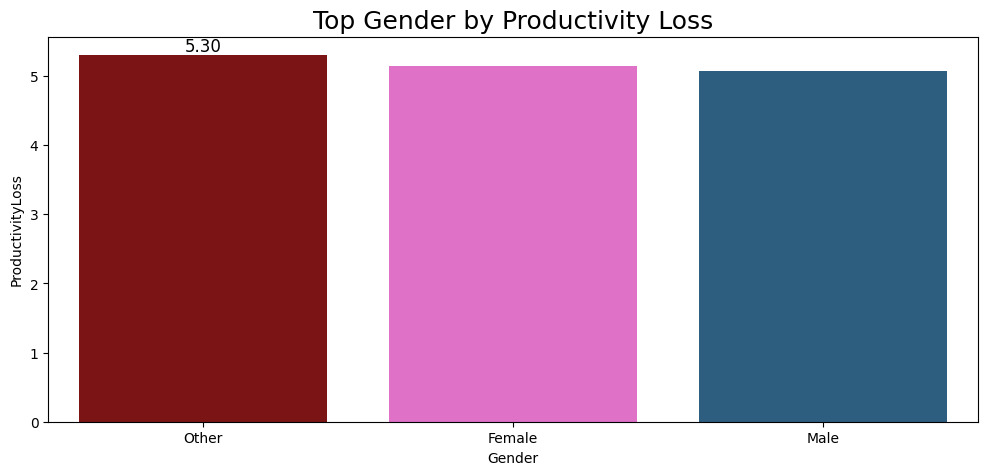

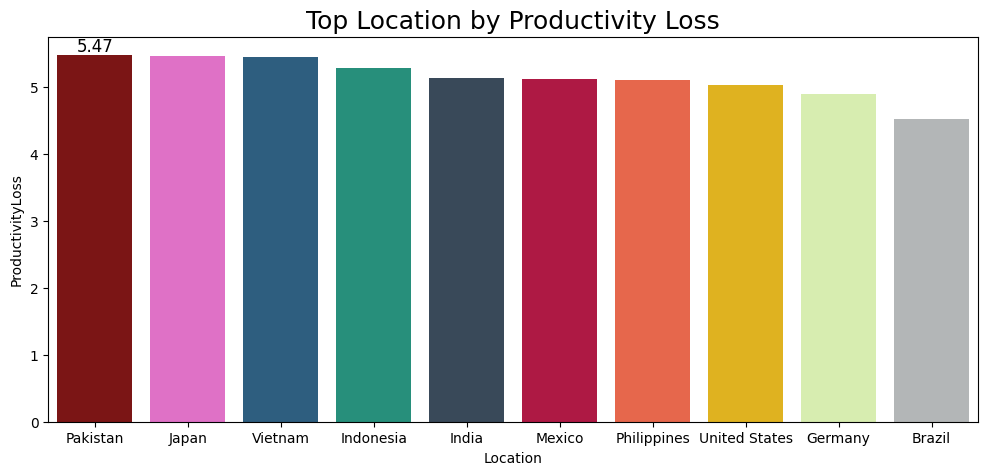

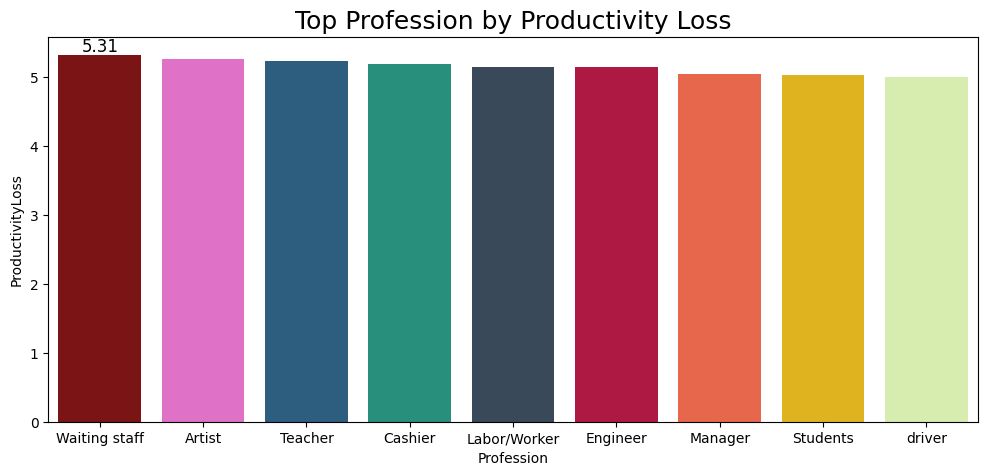

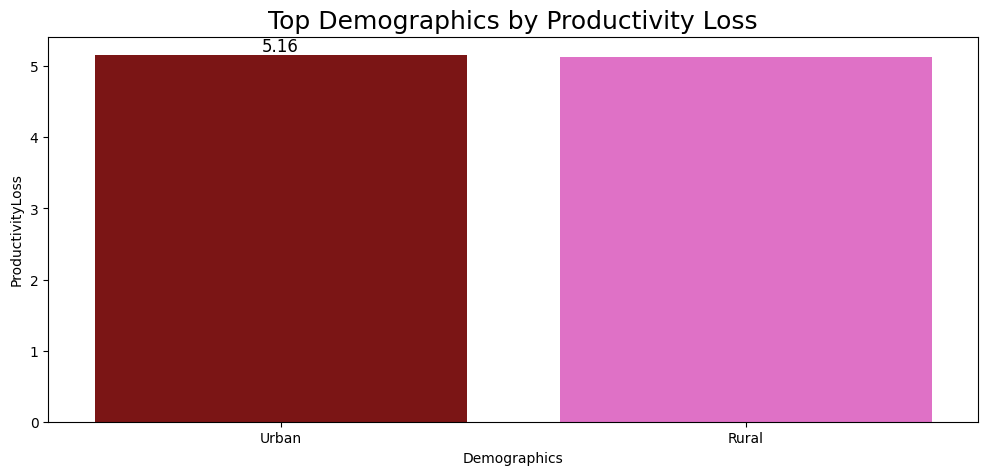

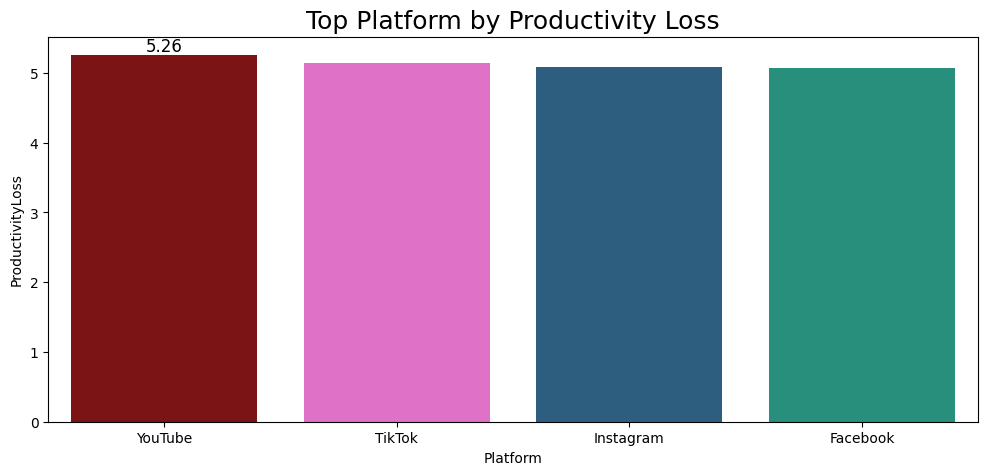

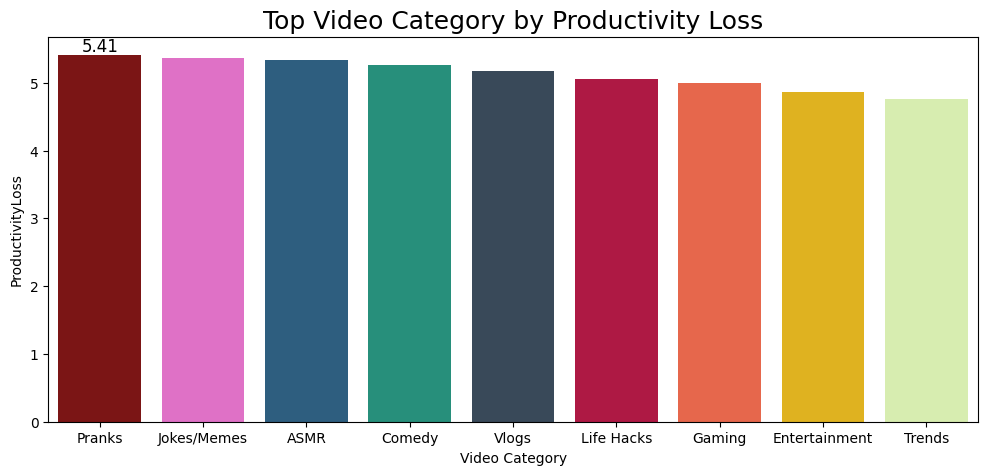

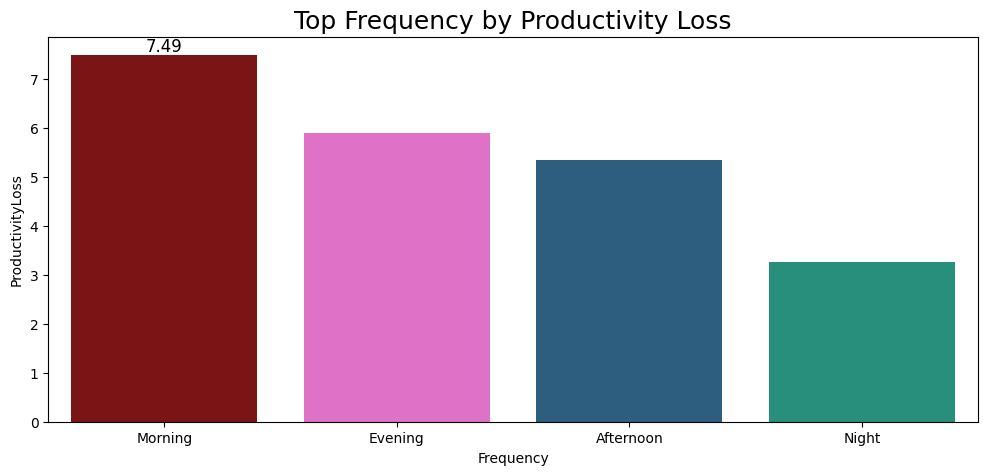

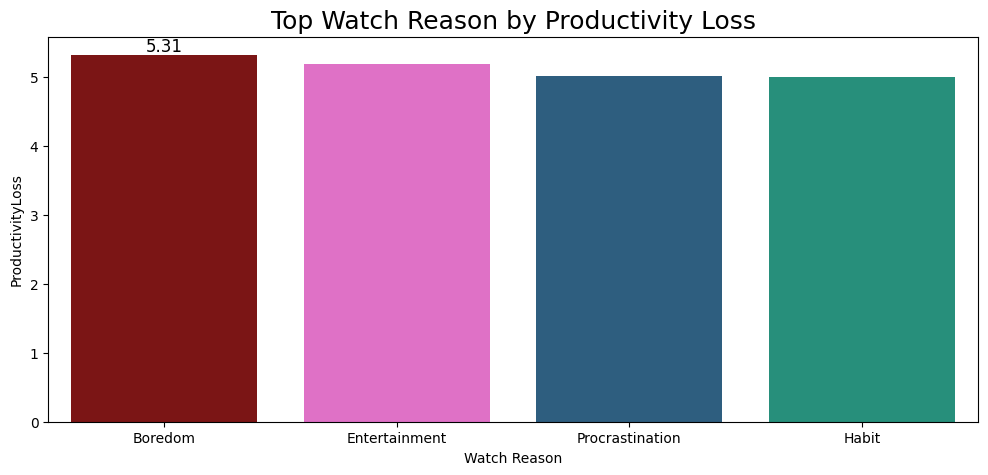

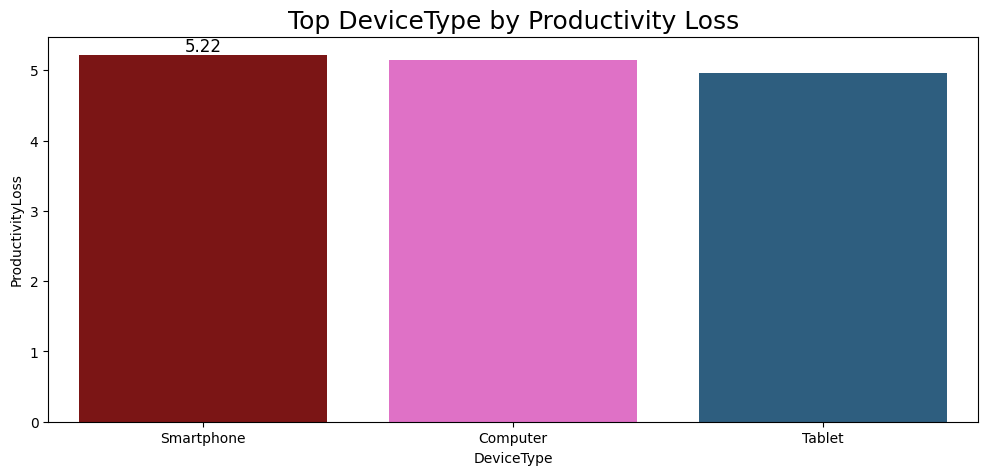

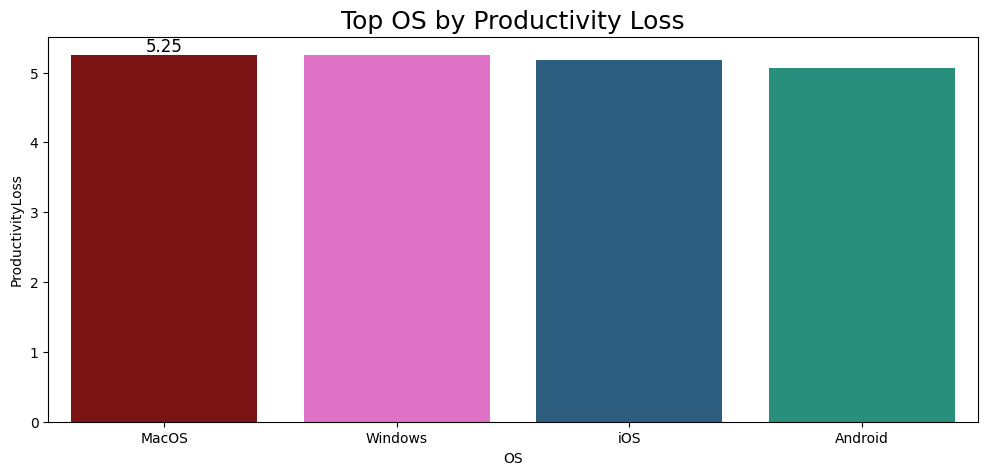

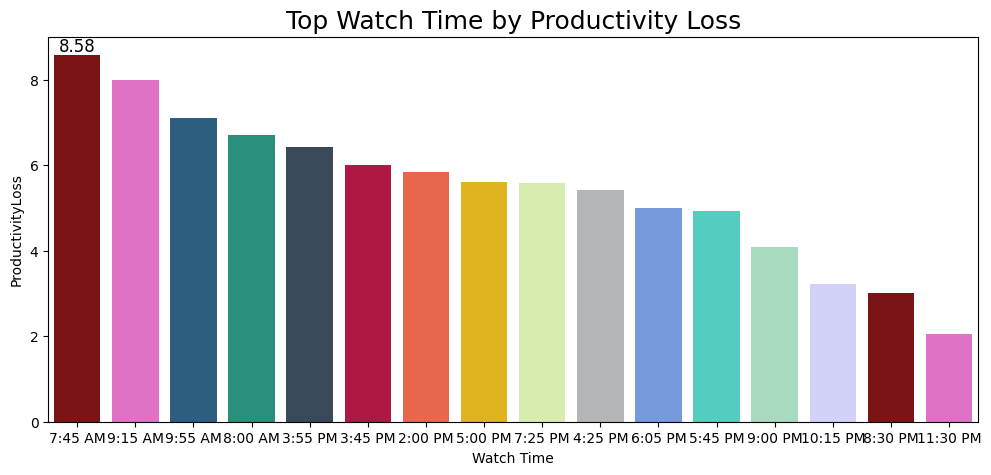

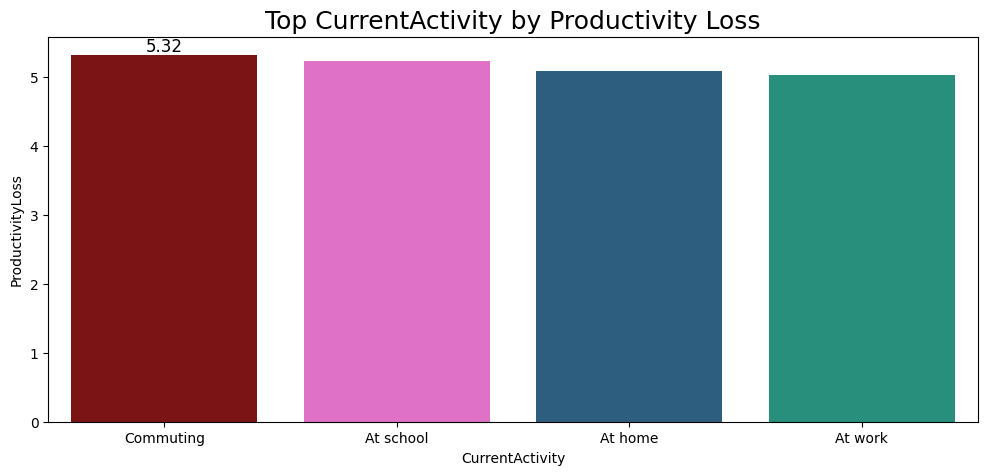

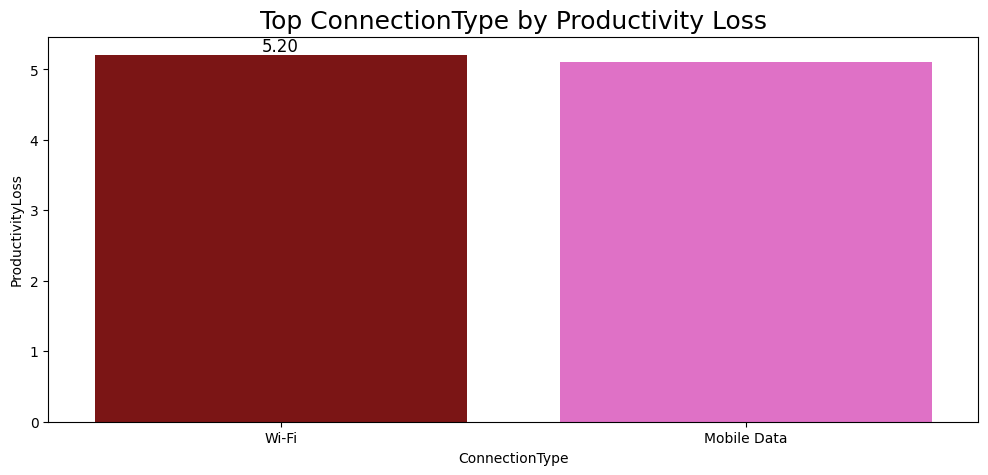

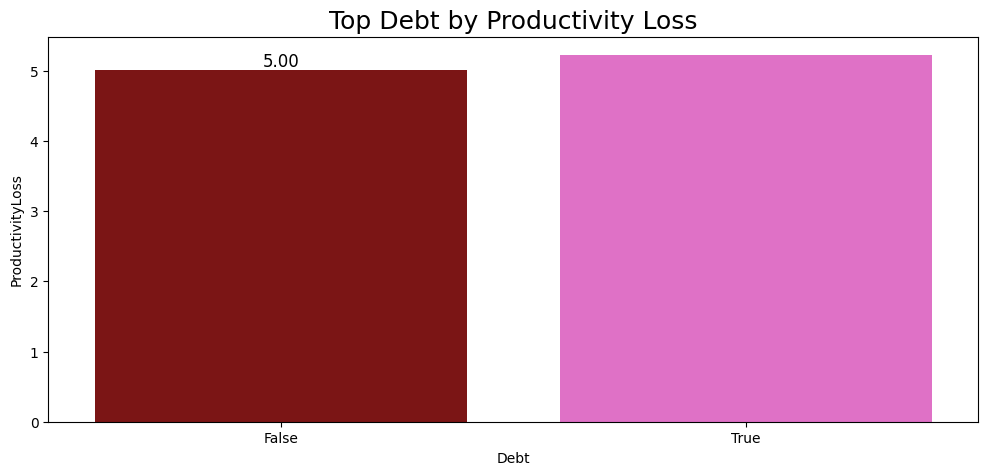

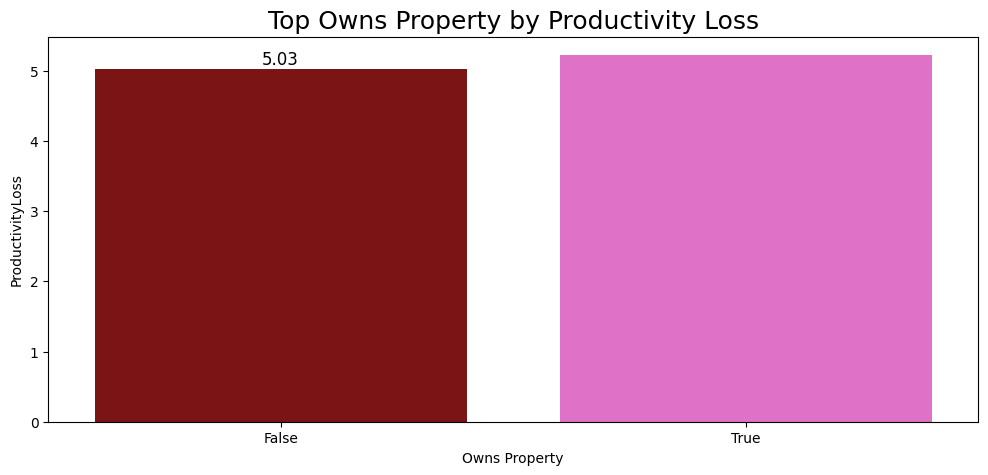

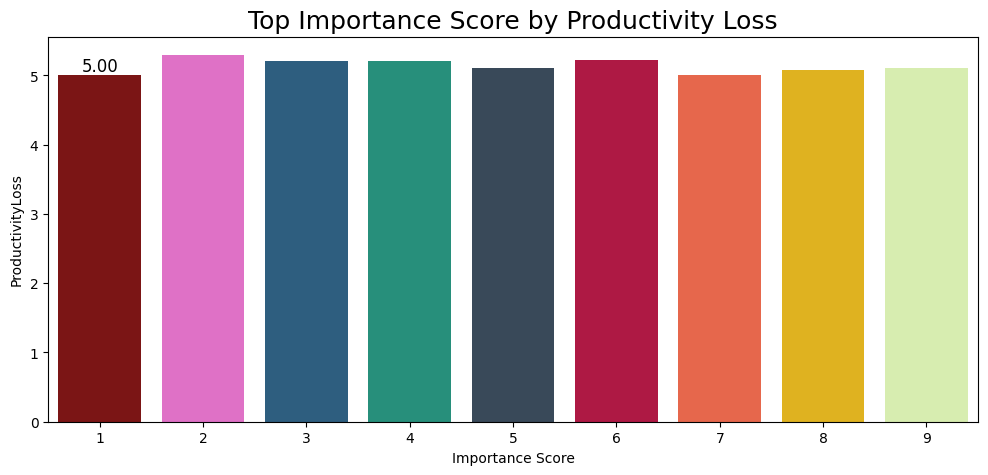

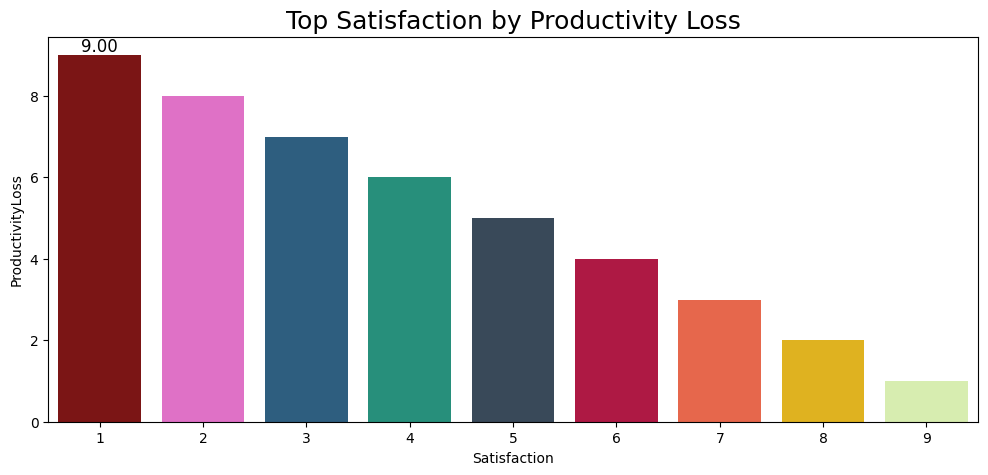

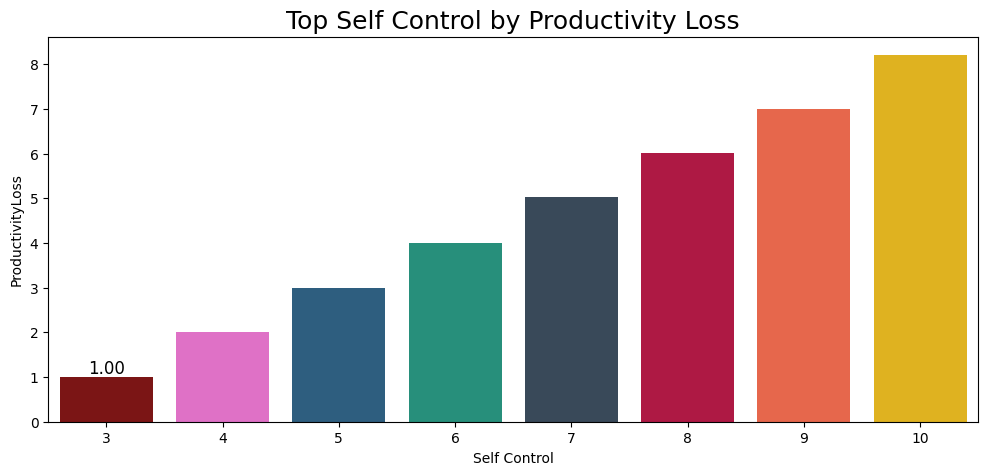

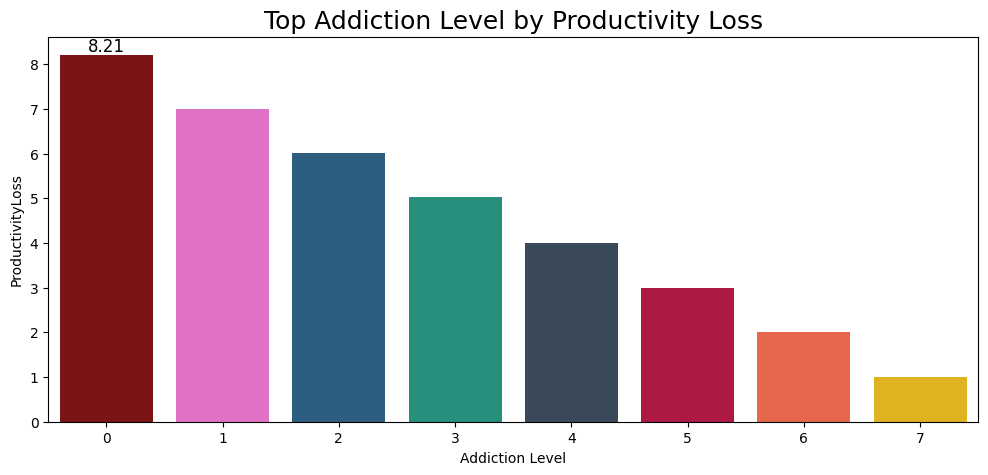

In [19]:
# Top Features by ProductivityLoss
for i in cols_cat:

    if i == 'Gender':
        fig, ax = plt.subplots(figsize=(12, 5))
        df_prof = df.groupby(['Gender'])[['ProductivityLoss']].mean()
        df_prof = df_prof.sort_values("ProductivityLoss", axis = 0, ascending = False)
        df_prof.reset_index(level=0, inplace=True)
        sns.barplot(x = 'Gender', y = 'ProductivityLoss', data = df_prof,
                   palette = colors)
        ax.bar_label(ax.containers[0], fmt='%0.2f', rotation = 0, fontsize = 12)
        plt.title("Top Gender by Productivity Loss", fontsize = 18)
        plt.show()

    else:

        fig, ax = plt.subplots(figsize=(12, 5))
        df_prof = df.groupby([i])[['ProductivityLoss']].mean()
        df_prof = df_prof.sort_values("ProductivityLoss", axis = 0, ascending = False)
        df_prof.reset_index(level=0, inplace=True)
        sns.barplot(x = i, y = 'ProductivityLoss', data = df_prof,
                   palette = colors)
        ax.bar_label(ax.containers[0], fmt='%0.2f', rotation = 0, fontsize = 12)
        plt.title("Top " + i + " by Productivity Loss", fontsize = 18)
        plt.show()

In [20]:
# Choropleth
df_prod = df.groupby(['Location'])[['ProductivityLoss']].mean()
df_prod.reset_index(level=0, inplace=True)

fig = px.choropleth(df, locations='Location', color = 'ProductivityLoss', locationmode='country names', title = f'Productivity Loss - Average by Location',color_continuous_scale='viridis_r')
fig.show()

df_prod

,Location,ProductivityLoss
0,Brazil,4.525641
1,Germany,4.898305
2,India,5.127193
3,Indonesia,5.285714
4,Japan,5.466667
5,Mexico,5.109589
6,Pakistan,5.473684
7,Philippines,5.102564
8,United States,5.028736
9,Vietnam,5.439024


In [24]:
from sklearn.metrics import mean_squared_error

# Drop rows with missing values for both target columns
df = df.dropna(subset=['ProductivityLoss', 'Addiction Level'])

# Calculate targets
df['productivity_loss'] = 10 - df['ProductivityLoss']

# Baseline prediction: always predict the mean
baseline_prod = df['productivity_loss'].mean()
baseline_addict = df['Addiction Level'].mean()

# Create prediction columns
df['baseline_prod_pred'] = baseline_prod
df['baseline_addict_pred'] = baseline_addict

# Evaluate baseline using MSE
mse_prod = mean_squared_error(df['productivity_loss'], df['baseline_prod_pred'])
mse_addict = mean_squared_error(df['Addiction Level'], df['baseline_addict_pred'])

# Display results
print(f" Baseline Mean Productivity Loss: {baseline_prod:.2f}")
print(f" Productivity Loss MSE: {mse_prod:.4f}")
print(f" Baseline Mean Addiction Level: {baseline_addict:.2f}")
print(f" Addiction Level MSE: {mse_addict:.4f}")


 Baseline Mean Productivity Loss: 4.86
 Productivity Loss MSE: 4.4995
 Baseline Mean Addiction Level: 2.91
 Addiction Level MSE: 4.2332


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>